In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

## example 1
function and derivatives

In [ ]:
def f(x):
    return 3*x**2 - 4*x+5

In [ ]:
f(3)

20

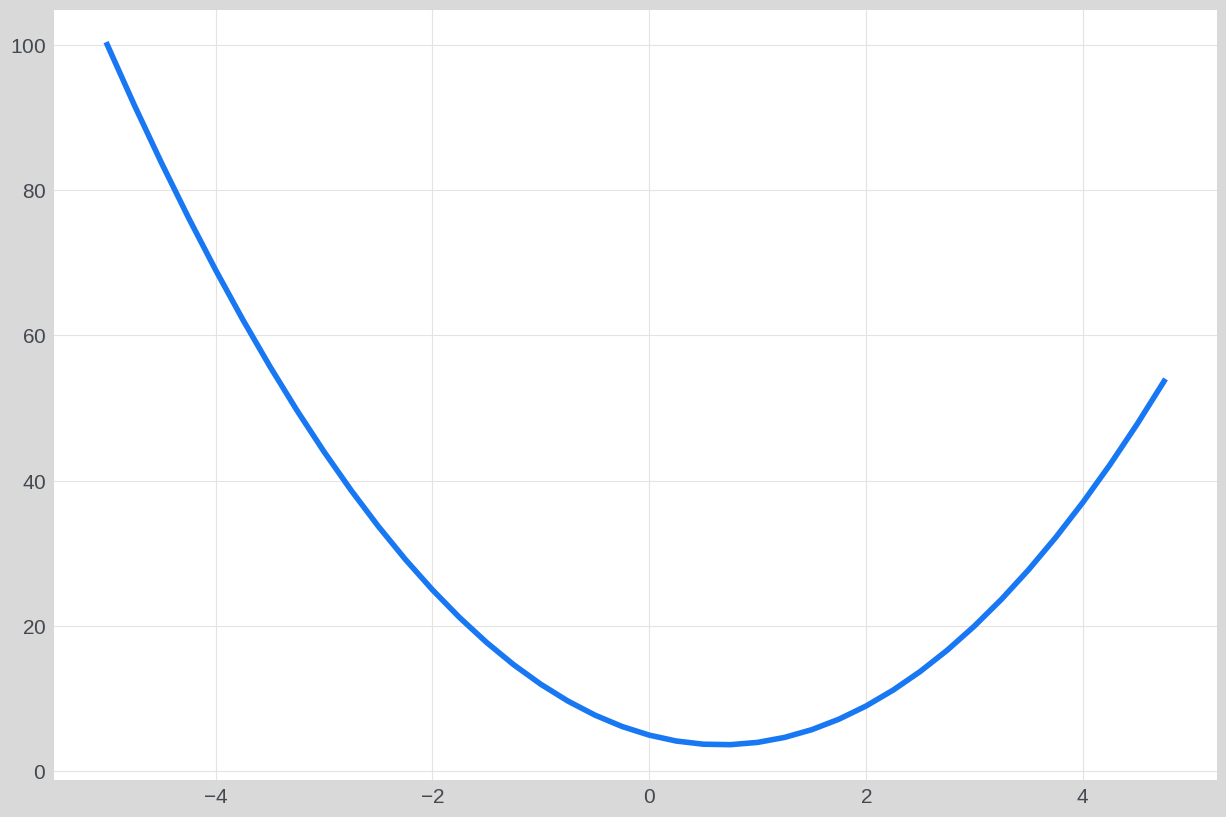

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [ ]:
# numerical slope
h = 0.00001
x = 3
(f(x+h) - f(x)) / h

14.00003000000538

## example2


In [ ]:
h = 0.000001

a = 2
b = -3
c = 10

d1 = a*b+c
a += h
d2 = a *b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4
d2 3.9999969999999996
slope -3.000000000419334


# value object Eample 1: simple expression backpropggation

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        #The __repr__() method returns a more information-rich, or official, string representation of an object.
        return 'Value({})'.format(self.data)

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
print(L)
print(L._prev)
print(L._op)
print(L.label)
print(L.grad)


#a.__mul__(b)

Value(-8.0)
{Value(4.0), Value(-2.0)}
*
L
0.0


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f |grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


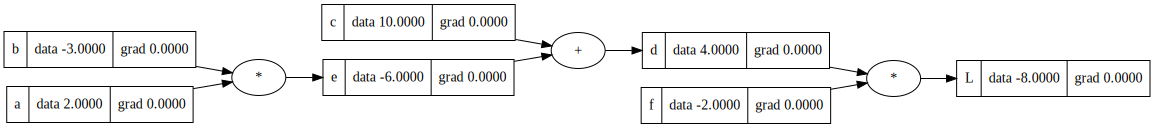

In [ ]:
draw_dot(L)
# L =(a*b +c )*f

goal: find the grad of each node


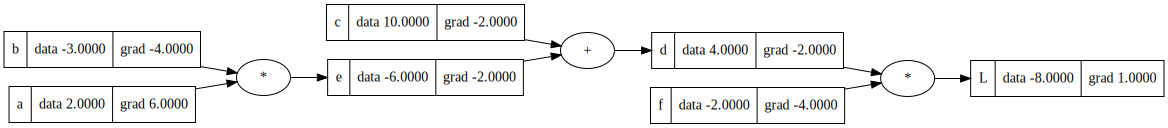

In [ ]:
L.grad = 1
d.grad = -2
f.grad = -4
e.grad = -2
c.grad = -2
a.grad  = 6
b.grad = -4
draw_dot(L)

In [ ]:
# test grad of b
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-3.9999999999995595


In [ ]:
# apply gradient descent
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.583904


# value object Eample 2: neural network  backpropggation

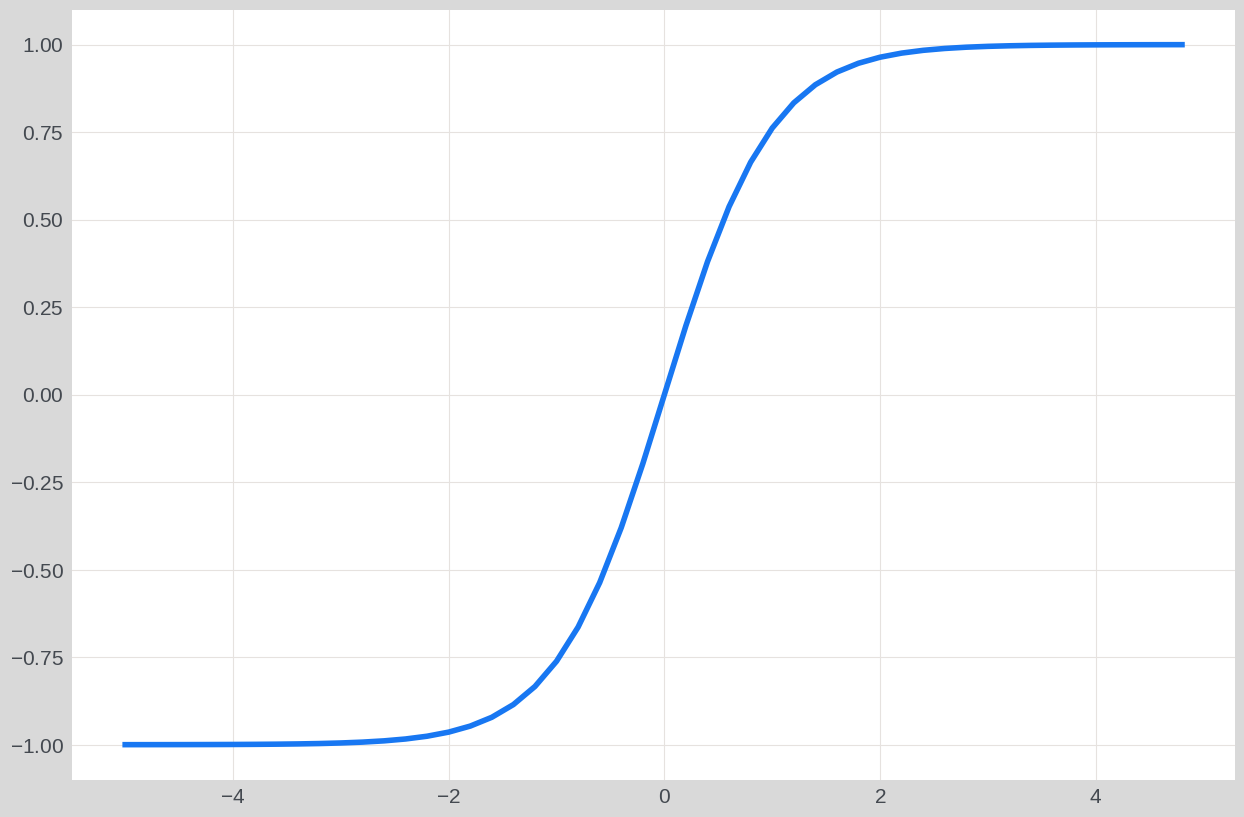

In [ ]:
# activation function used : tanh
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        #The __repr__() method returns a more information-rich, or official, string representation of an object.
        return 'Value({})'.format(self.data)

    def __add__(self,other):

        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1 ) / (math.exp(2*x)+1)
        out = Value(t, (self, ), _op = 'tanh')
        return out

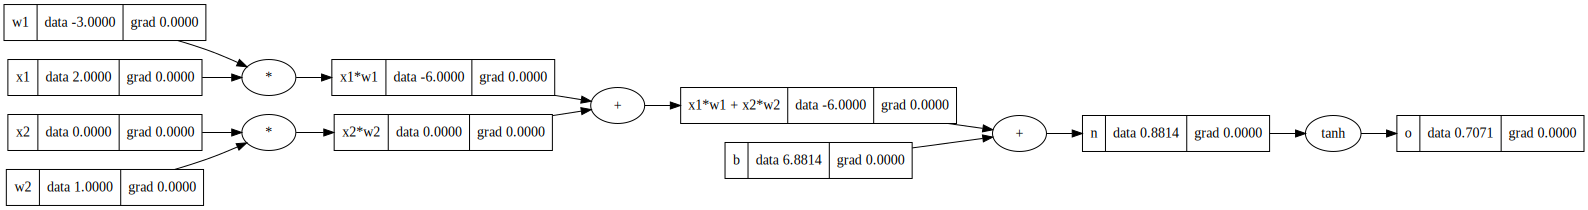

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh() ; o.label = 'o'
draw_dot(o)

In [ ]:
o.grad = 1.0

# o = tanh(n)
# do/dn = 1-tanh(n) **2
n.grad = 0.5

# n = x1w1 + x2w2 + b
# dn/db = 0.5 * 1
# dn/d(x1w1+x2w2) = 0.5 * 1
b.grad = 0.5
x1w1x2w2.grad = 0.5

# x1w1x2w2 = x1w1 + x2w2
# d(x1w1x2w2) / d(x1w1) = 0.5
# d(x1w1x2w2) / d(x2w2) = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

# x1w1 = x1 * w1
# d(x1w1) / d(x1) = w1 = 0.5 * -3 = -1.5
# d(x1w1) / d(w1) = x1 = 0.5 * 2 = 1
x1.grad = -1.5
w1.grad = 1

# x2w2 = x2 * w2
# d(x2w2) / d(x2) = 0.5 * w2 = 0.5
# d(x2w2) / d(w2) = 0.5 * x2 = 0
x2.grad = 0.5
w2.grad = 0

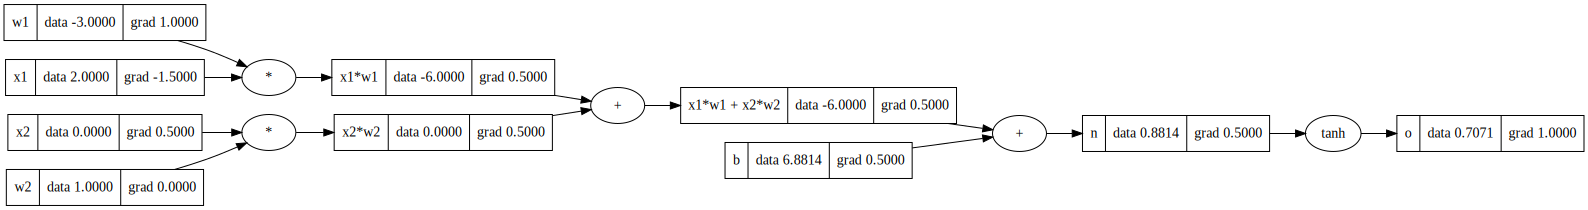

In [ ]:
draw_dot(o)

# value object: implement backward function for each operation

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda:None
    def __repr__(self):
        #The __repr__() method returns a more information-rich, or official, string representation of an object.
        return 'Value({})'.format(self.data)

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1 ) / (math.exp(2*x)+1)
        out = Value(t, (self, ), _op = 'tanh')

        def _backward():
            self.grad = (1 - t**2) *out.grad
        out._backward = _backward

        return out

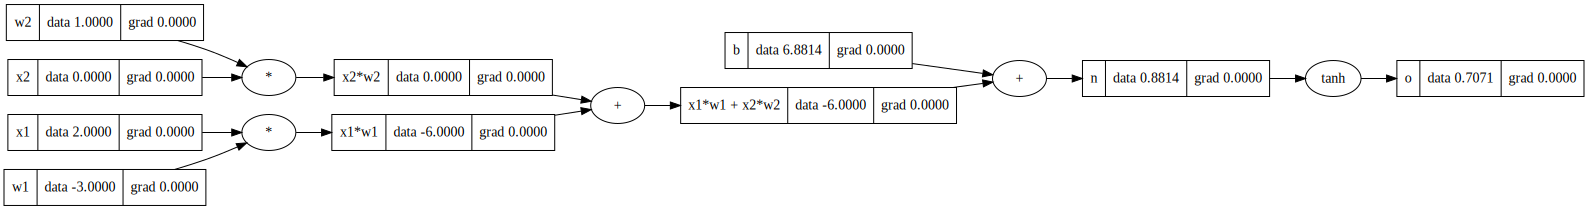

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh() ; o.label = 'o'
draw_dot(o)

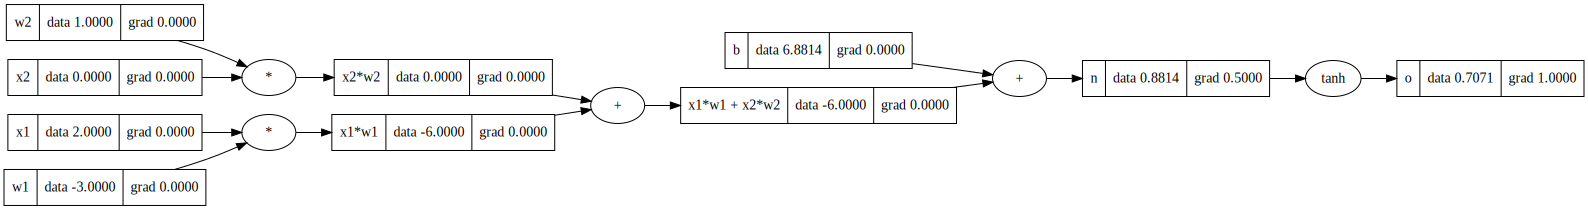

In [ ]:
o.grad = 1.0
o._backward()
draw_dot(o)

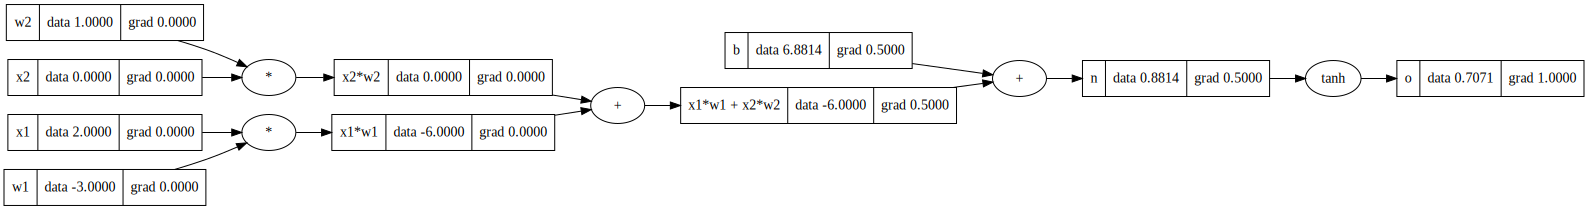

In [ ]:
n._backward()
draw_dot(o)

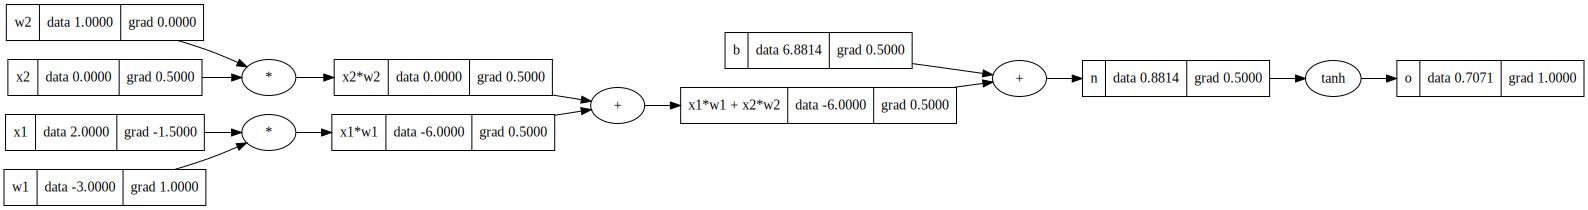

In [ ]:
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
draw_dot(o)

# value object: implement backward function for whole operation

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(-3.0),
 Value(2.0),
 Value(-6.0),
 Value(1.0),
 Value(0.0),
 Value(0.0),
 Value(-6.0),
 Value(6.881373587019543),
 Value(0.8813735870195432),
 Value(0.7071067811865476)]

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda:None
    def __repr__(self):
        #The __repr__() method returns a more information-rich, or official, string representation of an object.
        return 'Value({})'.format(self.data)

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1 ) / (math.exp(2*x)+1)
        out = Value(t, (self, ), _op = 'tanh')

        def _backward():
            self.grad = (1 - t**2) *out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

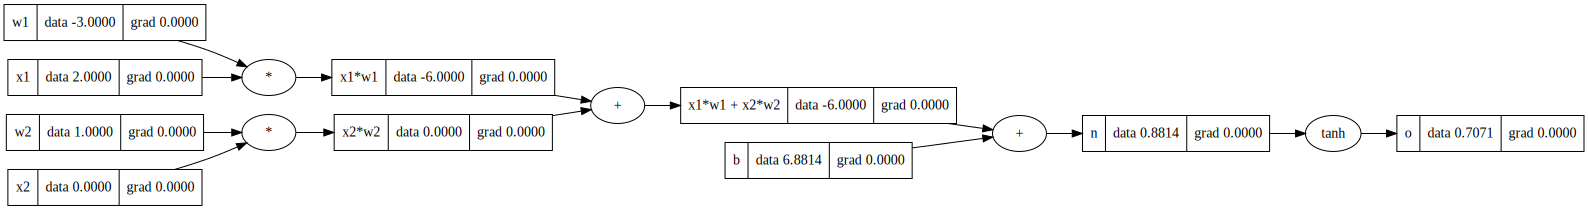

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh() ; o.label = 'o'
draw_dot(o)

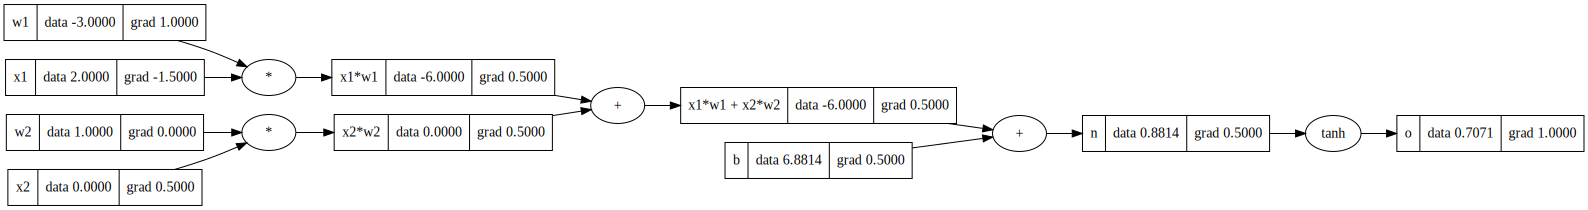

In [ ]:
o.backward()
draw_dot(o)

# value object: fix bug for repeated used node

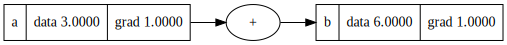

In [ ]:
# bug example
a = Value(3.0, label = 'a')
b = a+a; b.label = 'b'
b.backward()
draw_dot(b)

# wrong because a.grad = 2

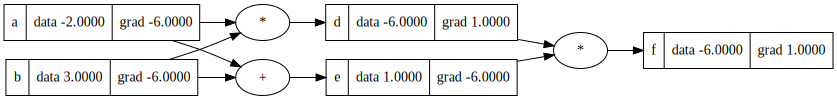

In [ ]:
# bug example 2
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

# wrong because it over right a and b again for mul and plus operation


when multivariant derivaitive, should be cumulative gradient

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda:None
    def __repr__(self):
        #The __repr__() method returns a more information-rich, or official, string representation of an object.
        return 'Value({})'.format(self.data)

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1 ) / (math.exp(2*x)+1)
        out = Value(t, (self, ), _op = 'tanh')

        def _backward():
            self.grad = (1 - t**2) *out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

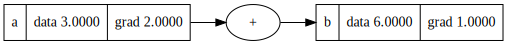

In [ ]:
# bug example 1
a = Value(3.0, label = 'a')
b = a+a; b.label = 'b'
b.backward()
draw_dot(b)



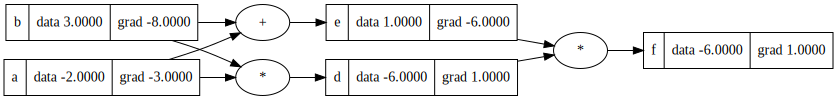

In [ ]:
# bug example 2
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)


# value object: add more function for more operations

In [ ]:
a = Value(2)
a+1
#wrong because + is override and 1 is not a object
# solution: define 1 in class value
# add reverse add function in class. i.e a+1 = 1+a.
# 1+a is wrong then python will check for a+1

AttributeError: 'int' object has no attribute 'data'

In [ ]:
2*a
# wrong because 2 is not a object
# add reverse mul function in class. i.e a+1 = 1+a.


TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

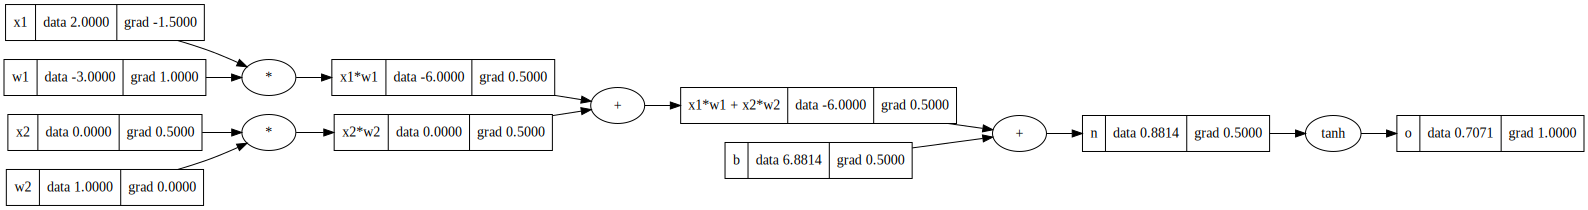

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)


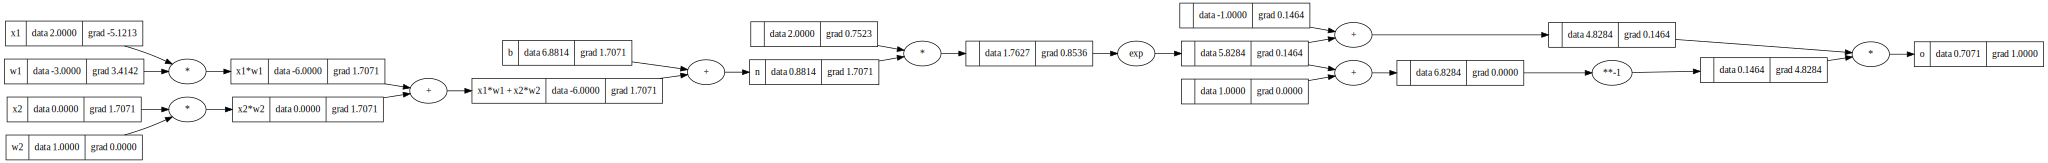

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

# same thing in pytorch

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


# build a neural network library

In [ ]:
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        act = sum(wi*xi for wi,xi in zip(self.w,x)) + self.b
        out = act.tanh()
        return out

x = [2.0,3.0]
n = Neuron(2)
n(x)

Value(-0.7948765959387242)

In [ ]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

x = [2.0,3.0]
n = Layer(2,3)
n(x)


[Value(-0.9896153461532873),
 Value(0.9887766183101158),
 Value(-0.6346257210721576)]

In [ ]:
class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts  #list
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
# total of 4 layers
n(x)

Value(-0.8991497064209064)

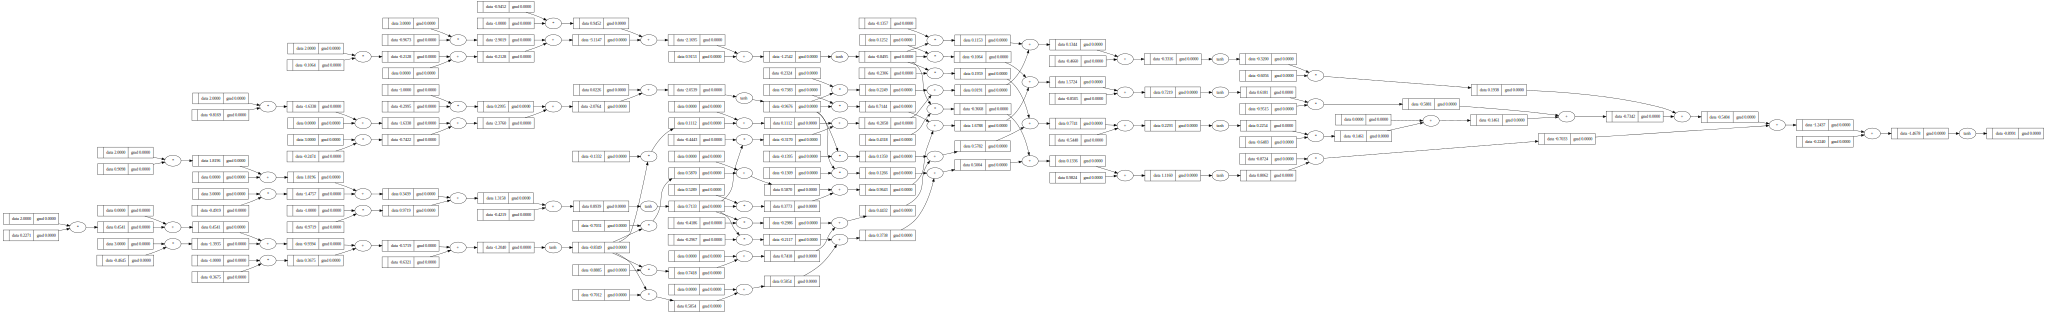

In [ ]:
draw_dot(n(x))

# training mini dataset

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

n = MLP(3, [4, 4, 1])
ypred = [n(x) for x in xs]

In [ ]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=4.048692811273141)

In [ ]:
loss.backward()

In [ ]:
print(n.layers[0].neurons[0].w[0])
print(n.layers[0].neurons[0].w[0].grad)


Value(data=0.08692920676136495)
-0.7616160825736431


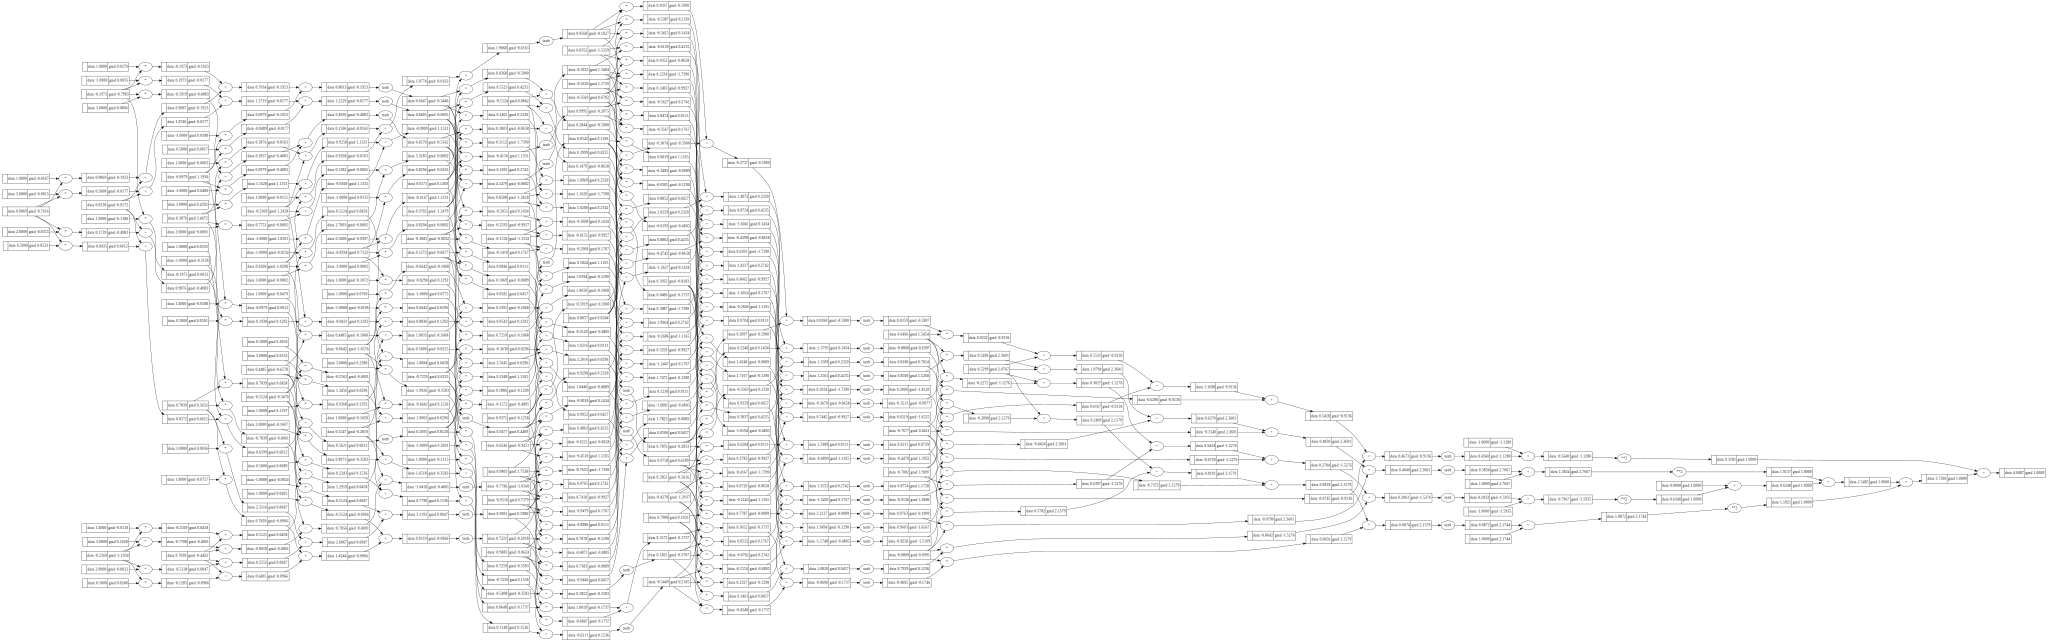

In [ ]:
draw_dot(loss)

In [ ]:
n = MLP(3, [4, 4, 1])
for k in range(20):



  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)


0 7.042654927474514
1 4.844392571549993
2 4.524404937743631
3 4.32878268948747
4 4.242466454553848
5 3.3723251654189035
6 3.312438139544807
7 1.6009709477708647
8 0.7195999167068807
9 0.30255371992694435
10 0.17902502151571562
11 0.12521786439490726
12 0.0955628582738633
13 0.07687949531069559
14 0.06408174086329121
15 0.05479381685161942
16 0.04776132308081184
17 0.04226108537819
18 0.037847619572281
19 0.034231904684235225


In [ ]:
ypred


[Value(data=0.9344798062429523),
 Value(data=-0.9603100549041478),
 Value(data=-0.8764558912783363),
 Value(data=0.8855422770070445)]